In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
dataset = pd.read_csv('Superstore_USA.csv')

In [6]:
dataset.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,28-05-2012,30-05-2012,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,07-07-2010,08-07-2010,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,27-07-2011,28-07-2011,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,27-07-2011,28-07-2011,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,27-07-2011,27-07-2011,998.2023,8,1446.67,88523


In [7]:
# gives column and row number
dataset.shape 

(9426, 24)

In [8]:
dataset.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Profit,Quantity ordered new,Sales,Order ID
count,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9354.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000
mean,20241.015277,0.049628,88.303686,12.795142,1738.422236,0.512189,52446.327286,139.236410,13.798430,949.706272,82318.489073
std,6101.890965,0.031798,281.540982,17.181203,979.167197,0.135229,29374.597802,998.486483,15.107688,2598.019818,19149.448857
min,2.000000,0.000000,0.990000,0.490000,2.000000,0.350000,1001.000000,-16476.838000,1.000000,1.320000,6.000000
25%,19330.250000,0.020000,6.480000,3.192500,898.000000,0.380000,29406.000000,-74.017375,5.000000,61.282500,86737.250000
50%,21686.500000,0.050000,20.990000,6.050000,1750.000000,0.520000,52302.000000,2.567600,10.000000,203.455000,88344.500000
75%,24042.750000,0.080000,85.990000,13.990000,2578.750000,0.590000,78516.000000,140.243850,17.000000,776.402500,89987.750000
max,26399.000000,0.250000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,16332.414000,170.000000,100119.160000,91591.000000


In [9]:
# getting column name with null value
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [10]:
#filling null value with mean value
#getting mean value first
mean_to_fill = dataset['Product Base Margin'].mean()
#print(mean_to_fill)
#replacing null value with mean value
dataset['Product Base Margin'].fillna(mean_to_fill, inplace = True)


C:\Users\sukhe\AppData\Local\Temp\ipykernel_18848\980003618.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Product Base Margin'].fillna(mean_to_fill, inplace = True)


In [11]:
#checking if there is any null anymore
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [12]:
dataset.shape

(9426, 24)

In [13]:
# get the category and their counts
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [14]:
# why there is two critical category
#get unique category from the column 
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [15]:
# replacing 'critical ' with 'critical' (remvoing the space)
dataset['Order Priority'] = dataset['Order Priority'].replace('Critical ', 'Critical')

In [16]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

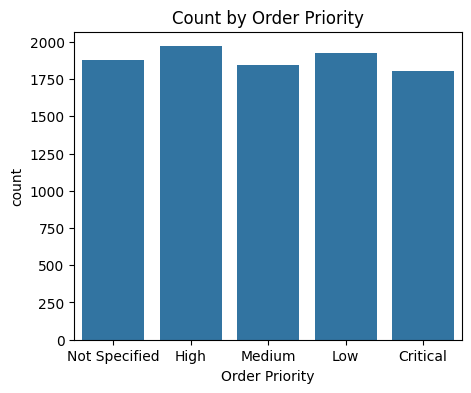

In [17]:
# Generating a chart
plt.figure(figsize = (5,4))
sns.countplot(x = 'Order Priority', data = dataset)
plt.title('Count by Order Priority')
plt.savefig('Count by Order Priority.jpg')
plt.show

In [18]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

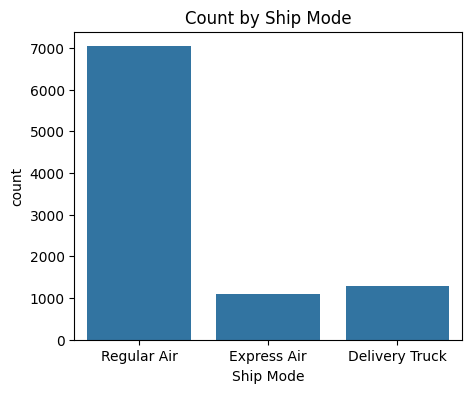

In [19]:
# Generating a chart on shipping mode
plt.figure(figsize = (5,4))
sns.countplot(x = 'Ship Mode', data = dataset)
plt.title('Count by Ship Mode')
plt.savefig('Count by Ship Mode.jpg')
plt.show

In [25]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [26]:
xdata = dataset['Ship Mode'].value_counts().index
ydata = dataset['Ship Mode'].value_counts().values

<function matplotlib.pyplot.show(close=None, block=None)>

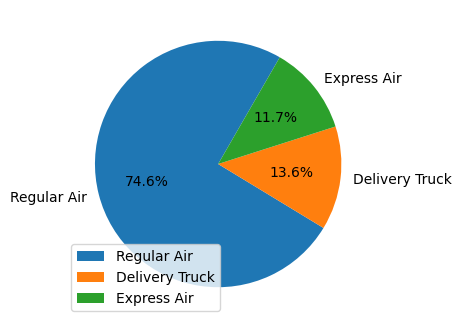

In [36]:
plt.figure(figsize = (5,4))
plt.pie(ydata, labels = xdata, startangle = 60, autopct = '%1.1f%%')
plt.legend(loc = 3)
plt.show

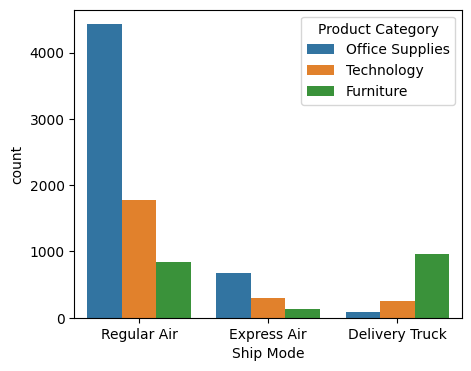

In [40]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'Ship Mode', data = dataset, hue = 'Product Category')
plt.show()

In [44]:
dataset['Customer Segment'].value_counts()

Customer Segment
Corporate         3375
Home Office       2316
Consumer          1894
Small Business    1841
Name: count, dtype: int64

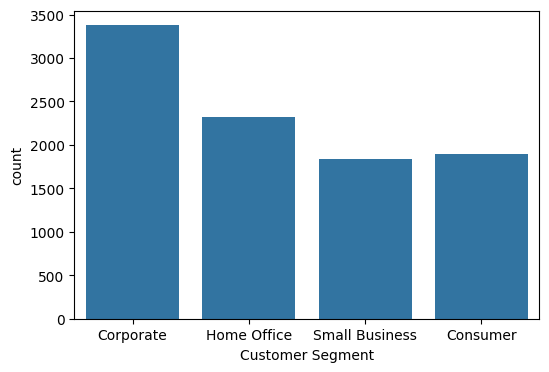

In [48]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'Customer Segment', data = dataset)
plt.show(block = False)

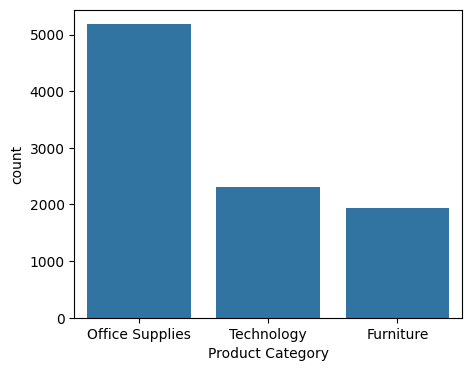

In [50]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'Product Category', data = dataset)
plt.show()

In [52]:
xdata1 = dataset['Product Category'].value_counts().index
ydata1 = dataset['Product Category'].value_counts().values

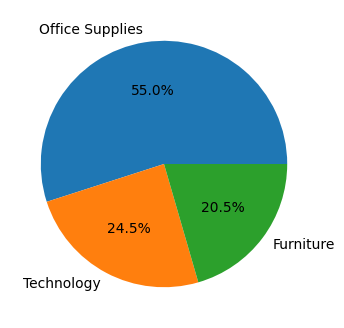

In [54]:
plt.figure(figsize = (5,4))
plt.pie(ydata1, labels = xdata1, autopct = '%1.1f%%')
plt.show()

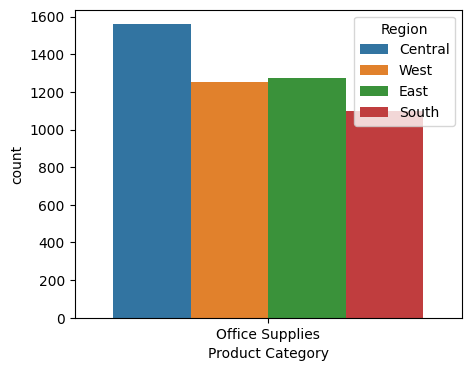

In [57]:
# showing only one category
plt.figure(figsize = (5,4))
sns.countplot(x = 'Product Category', data = dataset[dataset['Product Category']=='Office Supplies'], hue = 'Region')
plt.show()

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                9426 non-null   int64  
 1   Order Priority        9426 non-null   object 
 2   Discount              9426 non-null   float64
 3   Unit Price            9426 non-null   float64
 4   Shipping Cost         9426 non-null   float64
 5   Customer ID           9426 non-null   int64  
 6   Customer Name         9426 non-null   object 
 7   Ship Mode             9426 non-null   object 
 8   Customer Segment      9426 non-null   object 
 9   Product Category      9426 non-null   object 
 10  Product Sub-Category  9426 non-null   object 
 11  Product Container     9426 non-null   object 
 12  Product Name          9426 non-null   object 
 13  Product Base Margin   9426 non-null   float64
 14  Region                9426 non-null   object 
 15  State or Province    

In [60]:
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'], format = '%d/%m/%Y')
dataset['Ship Date'] = pd.to_datetime(dataset['Ship Date'], format = '%d/%m/%Y')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [61]:
dataset.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [62]:
# Extracting year from Order Date and create a new colomn named Order Year
dataset['Order Year'] = dataset['Order Date'].dt.year

In [63]:
# Extracting year from Ship Date and create a new colomn named Ship Date Year
dataset['Ship Date Year'] = dataset['Ship Date'].dt.year

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [65]:
dataset['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

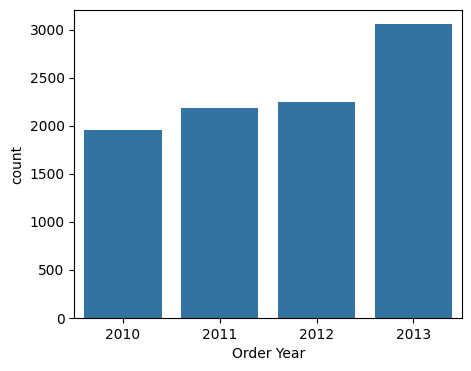

In [66]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'Order Year', data = dataset)
plt.show()

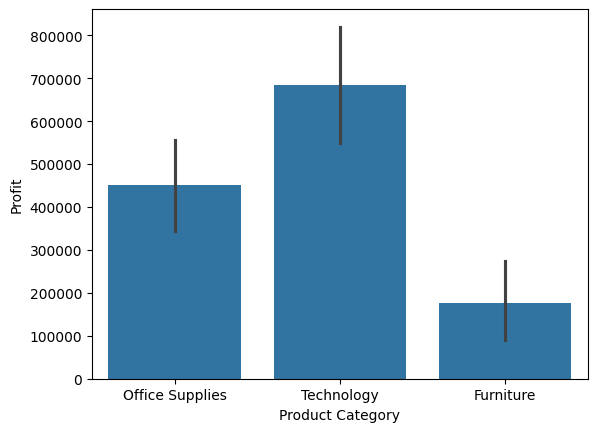

In [67]:
# Know the profit based on each category
sns.barplot(x = 'Product Category', y = 'Profit', data = dataset, estimator='sum' )
plt.show()

In [70]:
dataset['State or Province'].value_counts()

State or Province
California              1021
Texas                    646
Illinois                 584
New York                 574
Florida                  522
Ohio                     396
Washington               327
Michigan                 327
Pennsylvania             271
North Carolina           251
Indiana                  241
Minnesota                239
Massachusetts            222
Georgia                  214
Virginia                 198
Maryland                 178
New Jersey               177
Colorado                 177
Wisconsin                169
Oregon                   168
Tennessee                166
Missouri                 161
Iowa                     156
Utah                     146
Arizona                  134
Kansas                   133
Maine                    128
Alabama                  125
Arkansas                 123
Idaho                    114
South Carolina           105
Oklahoma                 104
Louisiana                 89
New Mexico               

In [71]:
# to know the top five
dataset['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64